The individual layers class.

In [439]:
from builtins import range

import numpy
import numpy as np


def affine_forward(x, w, b):
    """
    Computes the forward pass for an affine (fully-connected) layer.

    The input x has shape (N, d_1, ..., d_k) and contains a minibatch of N
    examples, where each example x[i] has shape (d_1, ..., d_k). We will
    reshape each input into a vector of dimension D = d_1 * ... * d_k, and
    then transform it to an output vector of dimension M.

    Inputs:
    - x: A numpy array containing input data, of shape (N, d_1, ..., d_k)
    - w: A numpy array of weights, of shape (D, M)
    - b: A numpy array of biases, of shape (M,)

    Returns a tuple of:
    - out: output, of shape (N, M)
    - cache: (x, w, b)
    """
    out = None
    ###########################################################################
    # TODO: Implement the affine forward pass. Store the result in out. You   #
    # will need to reshape the input into rows.                               #
    ###########################################################################
    x_reshape = x.reshape(x.shape[0], np.prod(x[0].shape))
    out = np.dot(x_reshape, w) + b
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = (x, w, b)
    return out, cache


def affine_backward(dout, cache):
    """
    Computes the backward pass for an affine layer.

    Inputs:
    - dout: Upstream derivative, of shape (N, M)
    - cache: Tuple of:
      - x: Input data, of shape (N, d_1, ... d_k)
      - w: Weights, of shape (D, M)
      - b: Biases, of shape (M,)

    Returns a tuple of:
    - dx: Gradient with respect to x, of shape (N, d1, ..., d_k)
    - dw: Gradient with respect to w, of shape (D, M)
    - db: Gradient with respect to b, of shape (M,)
    """
    x, w, b = cache
    dx, dw, db = None, None, None
    ###########################################################################
    # TODO: Implement the affine backward pass.                               #
    ###########################################################################
    dx = np.dot(dout, w.T)
    dx = np.reshape(dx, x.shape)

    x_reshape = x.reshape(x.shape[0], np.prod(x[0].shape))
    dw = np.dot(x_reshape.T, dout)

    db = np.sum(dout, 0)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx, dw, db


def relu_forward(x):
    """
    Computes the forward pass for a layer of rectified linear units (ReLUs).

    Input:
    - x: Inputs, of any shape

    Returns a tuple of:
    - out: Output, of the same shape as x
    - cache: x
    """
    out = None
    ###########################################################################
    # TODO: Implement the ReLU forward pass.                                  #
    ###########################################################################
    out = np.maximum(0, x)
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    cache = x
    return out, cache


def relu_backward(dout, cache):
    """
    Computes the backward pass for a layer of rectified linear units (ReLUs).

    Input:
    - dout: Upstream derivatives, of any shape
    - cache: Input x, of same shape as dout

    Returns:
    - dx: Gradient with respect to x
    """
    dx, x = None, cache
    ###########################################################################
    # TODO: Implement the ReLU backward pass.                                 #
    ###########################################################################
    dx = (x > 0) * dout
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################
    return dx


def batchnorm_forward(x, gamma, beta, bn_param):
    """
    Forward pass for batch normalization.

    During training the sample mean and (uncorrected) sample variance are
    computed from minibatch statistics and used to normalize the incoming data.
    During training we also keep an exponentially decaying running mean of the
    mean and variance of each feature, and these averages are used to normalize
    data at test-time.

    At each timestep we update the running averages for mean and variance using
    an exponential decay based on the momentum parameter:

    running_mean = momentum * running_mean + (1 - momentum) * sample_mean
    running_var = momentum * running_var + (1 - momentum) * sample_var

    Note that the batch normalization paper suggests a different test-time
    behavior: they compute sample mean and variance for each feature using a
    large number of training images rather than using a running average. For
    this implementation we have chosen to use running averages instead since
    they do not require an additional estimation step; the torch7
    implementation of batch normalization also uses running averages.

    Input:
    - x: Data of shape (N, D)
    - gamma: Scale parameter of shape (D,)
    - beta: Shift paremeter of shape (D,)
    - bn_param: Dictionary with the following keys:
      - mode: 'train' or 'test'; required
      - eps: Constant for numeric stability
      - momentum: Constant for running mean / variance.
      - running_mean: Array of shape (D,) giving running mean of features
      - running_var Array of shape (D,) giving running variance of features

    Returns a tuple of:
    - out: of shape (N, D)
    - cache: A tuple of values needed in the backward pass
    """
    mode = bn_param['mode']
    eps = bn_param.get('eps', 1e-5)
    momentum = bn_param.get('momentum', 0.9)

    N, D = x.shape
    running_mean = bn_param.get('running_mean', np.zeros(D, dtype=x.dtype))
    running_var = bn_param.get('running_var', np.zeros(D, dtype=x.dtype))

    out, cache = None, None
    if mode == 'train':
        #######################################################################
        # TODO: Implement the training-time forward pass for batch norm.      #
        # Use minibatch statistics to compute the mean and variance, use      #
        # these statistics to normalize the incoming data, and scale and      #
        # shift the normalized data using gamma and beta.                     #
        #                                                                     #
        # You should store the output in the variable out. Any intermediates  #
        # that you need for the backward pass should be stored in the cache   #
        # variable.                                                           #
        #                                                                     #
        # You should also use your computed sample mean and variance together #
        # with the momentum variable to update the running mean and running   #
        # variance, storing your result in the running_mean and running_var   #
        # variables.                                                          #
        #                                                                     #
        # Note that though you should be keeping track of the running         #
        # variance, you should normalize the data based on the standard       #
        # deviation (square root of variance) instead!                        #
        # Referencing the original paper (https://arxiv.org/abs/1502.03167)   #
        # might prove to be helpful.                                          #
        #######################################################################
        mu_x = np.mean(x, axis=0)
        var_x = np.var(x, axis=0)
        sd_x = np.sqrt(var_x + eps)

        norm_x = (x - mu_x)/sd_x
        out = gamma * norm_x + beta
        cache = {'mu_x': mu_x, 'var_x': var_x, 'sd_x': sd_x, 'norm_x': norm_x, 'x': x, 'beta': beta, 'gamma': gamma, 'eps': eps, 'N': N, 'D': D}

        running_mean = momentum * running_mean + (1 - momentum) * mu_x
        running_var = momentum * running_var + (1 - momentum) * var_x
        #######################################################################
        #                           END OF YOUR CODE                          #
        #######################################################################
    elif mode == 'test':
        #######################################################################
        # TODO: Implement the test-time forward pass for batch normalization. #
        # Use the running mean and variance to normalize the incoming data,   #
        # then scale and shift the normalized data using gamma and beta.      #
        # Store the result in the out variable.                               #
        #######################################################################
        norm_x = (x - running_mean) / np.sqrt(running_var + eps)
        out = gamma * norm_x + beta
        #######################################################################
        #                          END OF YOUR CODE                           #
        #######################################################################
    else:
        raise ValueError('Invalid forward batchnorm mode "%s"' % mode)

    # Store the updated running means back into bn_param
    bn_param['running_mean'] = running_mean
    bn_param['running_var'] = running_var

    return out, cache


def batchnorm_backward(dout, cache):
    """
    Backward pass for batch normalization.

    For this implementation, you should write out a computation graph for
    batch normalization on paper and propagate gradients backward through
    intermediate nodes.

    Inputs:
    - dout: Upstream derivatives, of shape (N, D)
    - cache: Variable of intermediates from batchnorm_forward.

    Returns a tuple of:
    - dx: Gradient with respect to inputs x, of shape (N, D)
    - dgamma: Gradient with respect to scale parameter gamma, of shape (D,)
    - dbeta: Gradient with respect to shift parameter beta, of shape (D,)
    """
    dx, dgamma, dbeta = None, None, None
    ###########################################################################
    # TODO: Implement the backward pass for batch normalization. Store the    #
    # results in the dx, dgamma, and dbeta variables.                         #
    # Referencing the original paper (https://arxiv.org/abs/1502.03167)       #
    # might prove to be helpful.                                              #
    ###########################################################################
    mu_x = cache['mu_x']
    var_x = cache['var_x']
    norm_x = cache['norm_x']
    x = cache['x']
    beta = cache['beta']
    gamma = cache['gamma']
    eps = cache['eps']
    N = cache['N']

    b = x - mu_x
    c = var_x + eps
    d = np.sqrt(c)
    e = 1 / d

    dx = (-2 / N) * b * np.sum(dout * gamma * b * (1 / d ** 2) * (1 / 2) * (1 / np.sqrt(c)), axis=0) - (
                1 / N) * np.sum(dout * gamma * e, axis=0) + dout * gamma * e
    dgamma = np.sum(norm_x * dout, axis=0)
    dbeta = np.sum(dout, axis=0)


    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

    return dx, dgamma, dbeta


def batchnorm_backward_alt(dout, cache):
    """
    Alternative backward pass for batch normalization.

    For this implementation you should work out the derivatives for the batch
    normalization backward pass on paper and simplify as much as possible. You
    should be able to derive a simple expression for the backward pass.
    See the Jupyter notebook for more hints.

    Note: This implementation should expect to receive the same cache variable
    as batchnorm_backward, but might not use all of the values in the cache.

    Inputs / outputs: Same as batchnorm_backward
    """
    dx, dgamma, dbeta = None, None, None
    ###########################################################################
    # TODO: Implement the backward pass for batch normalization. Store the    #
    # results in the dx, dgamma, and dbeta variables.                         #
    #                                                                         #
    # After computing the gradient with respect to the centered inputs, you   #
    # should be able to compute gradients with respect to the inputs in a     #
    # single statement; our implementation fits on a single 80-character line.#
    ###########################################################################
    mu_x = cache['mu_x']
    var_x = cache['var_x']
    norm_x = cache['norm_x']
    gamma = cache['gamma']
    x = cache['x']
    eps = cache['eps']
    N = cache['N']

    dgamma = np.sum(norm_x * dout, axis=0)
    dbeta = np.sum(dout, axis=0)
    # Used quotient rule below
    dx = gamma * (dout / (var_x + eps) ** (1 / 2) - (1 / ((N * (var_x + eps) ** (3 / 2)))) * (np.sum(dout * (var_x + eps), axis=0) + (x - mu_x) * np.sum(dout * (x - mu_x), axis=0)))
    ###########################################################################
    #                             END OF YOUR CODE                            #
    ###########################################################################

    return dx, dgamma, dbeta


def svm_loss(x, y):
    """
    Computes the loss and gradient using for multi-class SVM classification.

    Inputs:
    - x: Input data, of shape (N, C) where x[i, j] is the score for the jth
      class for the ith input.
    - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
      0 <= y[i] < C

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """
    N = x.shape[0]
    correct_class_scores = x[np.arange(N), y]
    margins = np.maximum(0, x - correct_class_scores[:, np.newaxis] + 1.0)
    margins[np.arange(N), y] = 0
    loss = np.sum(margins) / N
    num_pos = np.sum(margins > 0, axis=1)
    dx = np.zeros_like(x)
    dx[margins > 0] = 1
    dx[np.arange(N), y] -= num_pos
    dx /= N
    return loss, dx


def softmax_loss(x, y):
    """
    Computes the loss and gradient for softmax classification.

    Inputs:
    - x: Input data, of shape (N, C) where x[i, j] is the score for the jth
      class for the ith input.
    - y: Vector of labels, of shape (N,) where y[i] is the label for x[i] and
      0 <= y[i] < C

    Returns a tuple of:
    - loss: Scalar giving the loss
    - dx: Gradient of the loss with respect to x
    """
    shifted_logits = x - np.max(x, axis=1, keepdims=True)
    Z = np.sum(np.exp(shifted_logits), axis=1, keepdims=True)
    log_probs = shifted_logits - np.log(Z)
    probs = np.exp(log_probs)
    N = x.shape[0]
    loss = -np.sum(log_probs[np.arange(N), y]) / N
    dx = probs.copy()
    dx[np.arange(N), y] -= 1
    dx /= N
    return loss, dx

Some helper methods class.

In [440]:
def affine_relu_forward(x, w, b):
    """
    Convenience layer that performs an affine transform followed by a ReLU

    Inputs:
    - x: Input to the affine layer
    - w, b: Weights for the affine layer

    Returns a tuple of:
    - out: Output from the ReLU
    - cache: Object to give to the backward pass
    """
    a, fc_cache = affine_forward(x, w, b)
    out, relu_cache = relu_forward(a)
    cache = (fc_cache, relu_cache)
    return out, cache


def affine_relu_backward(dout, cache):
    """
    Backward pass for the affine-relu convenience layer
    """
    fc_cache, relu_cache = cache
    da = relu_backward(dout, relu_cache)
    dx, dw, db = affine_backward(da, fc_cache)
    return dx, dw, db

Neural network class:

In [441]:
from builtins import object

class FullyConnectedNet(object):
    """
    A fully-connected neural network with an arbitrary number of hidden layers,
    ReLU nonlinearities, and a softmax loss function. This will also implement
    dropout and batch/layer normalization as options. For a network with L layers,
    the architecture will be

    {affine - [batch/layer norm] - relu - [dropout]} x (L - 1) - affine - softmax

    where batch/layer normalization and dropout are optional, and the {...} block is
    repeated L - 1 times.

    Similar to the TwoLayerNet above, learnable parameters are stored in the
    self.params dictionary and will be learned using the Solver class.
    """

    def __init__(self, hidden_dims, input_dim=3*32*32, num_classes=10,
                 dropout=1, normalization=None, reg=0.0,
                 weight_scale=1e-2, dtype=np.float32, seed=None):
        """
        Initialize a new FullyConnectedNet.

        Inputs:
        - hidden_dims: A list of integers giving the size of each hidden layer.
        - input_dim: An integer giving the size of the input.
        - num_classes: An integer giving the number of classes to classify.
        - dropout: Scalar between 0 and 1 giving dropout strength. If dropout=1 then
          the network should not use dropout at all.
        - normalization: What type of normalization the network should use. Valid values
          are "batchnorm", "layernorm", or None for no normalization (the default).
        - reg: Scalar giving L2 regularization strength.
        - weight_scale: Scalar giving the standard deviation for random
          initialization of the weights.
        - dtype: A numpy datatype object; all computations will be performed using
          this datatype. float32 is faster but less accurate, so you should use
          float64 for numeric gradient checking.
        - seed: If not None, then pass this random seed to the dropout layers. This
          will make the dropout layers deterministic so we can gradient check the
          model.
        """
        self.normalization = normalization
        self.use_dropout = dropout != 1
        self.reg = reg
        self.num_layers = 1 + len(hidden_dims)
        self.dtype = dtype
        self.params = {}

        ############################################################################
        # TODO: Initialize the parameters of the network, storing all values in    #
        # the self.params dictionary. Store weights and biases for the first layer #
        # in W1 and b1; for the second layer use W2 and b2, etc. Weights should be #
        # initialized from a normal distribution centered at 0 with standard       #
        # deviation equal to weight_scale. Biases should be initialized to zero.   #
        #                                                                          #
        # When using batch normalization, store scale and shift parameters for the #
        # first layer in gamma1 and beta1; for the second layer use gamma2 and     #
        # beta2, etc. Scale parameters should be initialized to ones and shift     #
        # parameters should be initialized to zeros.                               #
        ############################################################################
        all_dims = np.hstack([input_dim, hidden_dims, num_classes])  # combine all the dims to avoid ugly hard-coding.
        for i in range(self.num_layers):
            self.params['W{}'.format(i + 1)] = np.random.randn(all_dims[i], all_dims[i + 1]) * weight_scale
            # For 0 initialization, uncomment
            # self.params['W{}'.format(i + 1)] = np.zeros(all_dims[i], all_dims[i + 1])
            self.params['b{}'.format(i + 1)] = np.zeros(all_dims[i + 1]).astype(numpy.float64)

        if self.normalization == 'batchnorm' or self.normalization == 'layernorm':
            for i in range(len(hidden_dims)):
                self.params['gamma{}'.format(i+1)] = np.ones(hidden_dims[i])
                self.params['beta{}'.format(i+1)] = np.zeros(hidden_dims[i])
        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################

        # When using dropout we need to pass a dropout_param dictionary to each
        # dropout layer so that the layer knows the dropout probability and the mode
        # (train / test). You can pass the same dropout_param to each dropout layer.
        self.dropout_param = {}
        if self.use_dropout:
            self.dropout_param = {'mode': 'train', 'p': dropout}
            if seed is not None:
                self.dropout_param['seed'] = seed

        # With batch normalization we need to keep track of running means and
        # variances, so we need to pass a special bn_param object to each batch
        # normalization layer. You should pass self.bn_params[0] to the forward pass
        # of the first batch normalization layer, self.bn_params[1] to the forward
        # pass of the second batch normalization layer, etc.
        self.bn_params = []
        if self.normalization=='batchnorm':
            self.bn_params = [{'mode': 'train'} for i in range(self.num_layers - 1)]
        if self.normalization=='layernorm':
            self.bn_params = [{} for i in range(self.num_layers - 1)]

        # Cast all parameters to the correct datatype
        for k, v in self.params.items():
            self.params[k] = v.astype(dtype)


    def loss(self, X, y=None):
        """
        Compute loss and gradient for the fully-connected net.

        Input / output: Same as TwoLayerNet above.
        """
        X = X.astype(self.dtype)
        mode = 'test' if y is None else 'train'

        # Set train/test mode for batchnorm params and dropout param since they
        # behave differently during training and testing.
        if self.use_dropout:
            self.dropout_param['mode'] = mode
        if self.normalization=='batchnorm':
            for bn_param in self.bn_params:
                bn_param['mode'] = mode
        scores = None
        ############################################################################
        # TODO: Implement the forward pass for the fully-connected net, computing  #
        # the class scores for X and storing them in the scores variable.          #
        #                                                                          #
        # When using dropout, you'll need to pass self.dropout_param to each       #
        # dropout forward pass.                                                    #
        #                                                                          #
        # When using batch normalization, you'll need to pass self.bn_params[0] to #
        # the forward pass for the first batch normalization layer, pass           #
        # self.bn_params[1] to the forward pass for the second batch normalization #
        # layer, etc.                                                              #
        ############################################################################
        cache = {}
        temp_scores = X
        for i in range(self.num_layers-1):
            temp_scores, cache_i = affine_relu_forward(temp_scores, self.params['W{}'.format(i + 1)], self.params['b{}'.format(i + 1)])
            cache[i + 1] = cache_i

        scores, cache_scores = affine_forward(temp_scores, self.params['W{}'.format((self.num_layers-1)+1)],
                                               self.params['b{}'.format((self.num_layers-1) + 1)])
        cache[(self.num_layers-1) + 1] = cache_scores
        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################

        # If test mode return early
        if mode == 'test':
            return scores

        loss, grads = 0.0, {}
        ############################################################################
        # TODO: Implement the backward pass for the fully-connected net. Store the #
        # loss in the loss variable and gradients in the grads dictionary. Compute #
        # data loss using softmax, and make sure that grads[k] holds the gradients #
        # for self.params[k]. Don't forget to add L2 regularization!               #
        #                                                                          #
        # When using batch/layer normalization, you don't need to regularize the scale   #
        # and shift parameters.                                                    #
        #                                                                          #
        # NOTE: To ensure that your implementation matches ours and you pass the   #
        # automated tests, make sure that your L2 regularization includes a factor #
        # of 0.5 to simplify the expression for the gradient.                      #
        ############################################################################
        loss, dscores = softmax_loss(scores, y)

        for i in range(self.num_layers):
            loss += 0.5 * self.reg * np.sum(np.square(self.params['W{}'.format(i+1)]))

        dout, dw, db = affine_backward(dscores, cache[(self.num_layers-1) + 1]) # calculate the first backprop layer
        # calculate the first backprop reg for w
        grads['W{}'.format((self.num_layers-1) + 1)] = dw + self.reg * self.params['W{}'.format((self.num_layers-1) + 1)]
        # calculate the first backprop reg for b
        grads['b{}'.format((self.num_layers - 1) + 1)] = db
        # backprop for every layer except for the last
        for i in reversed(range(self.num_layers - 1)):
            dout, dw, db = affine_relu_backward(dout, cache[i + 1])
            grads['W{}'.format(i + 1)] = dw + self.reg * self.params['W{}'.format(i + 1)]
            grads['b{}'.format(i + 1)] = db
        ############################################################################
        #                             END OF YOUR CODE                             #
        ############################################################################

        return loss, grads

## Load the dataset
Note: we will need to turn the label values into -1 and 1.

In [505]:
import pandas as pd
import os

cwd = os.getcwd()
train = pd.read_csv(cwd + "/bank-note/train.csv", names=['variance', 'skewness', 'curtosis', 'entropy', 'label'])
print(train.head())

   variance  skewness  curtosis  entropy  label
0  3.848100  10.15390  -3.85610 -4.22280      0
1  4.004700   0.45937   1.36210  1.61810      0
2 -0.048008  -1.60370   8.47560  0.75558      0
3 -1.266700   2.81830  -2.42600 -1.88620      1
4  2.203400   5.99470   0.53009  0.84998      0


In [506]:
train['label'] = train['label'].apply(lambda x: 1 if x == 1 else 0)
print(train.head())

   variance  skewness  curtosis  entropy  label
0  3.848100  10.15390  -3.85610 -4.22280     -1
1  4.004700   0.45937   1.36210  1.61810     -1
2 -0.048008  -1.60370   8.47560  0.75558     -1
3 -1.266700   2.81830  -2.42600 -1.88620      1
4  2.203400   5.99470   0.53009  0.84998     -1


In [508]:
test = pd.read_csv(cwd + "/bank-note/test.csv", names=['variance', 'skewness', 'curtosis', 'entropy', 'label'])
print(test.head())

   variance  skewness  curtosis   entropy  label
0   3.83840    6.1851  -2.04390 -0.033204      0
1   2.85210    9.1710  -3.64610 -1.204700      0
2   5.24180   10.5388  -4.11740 -4.279700      0
3  -2.26230   12.1177   0.28846 -7.758100      0
4   0.55298   -3.4619   1.70480  1.100800      1


In [509]:
test['label'] = test['label'].apply(lambda x: 1 if x == 1 else 0)
print(test.head())

   variance  skewness  curtosis   entropy  label
0   3.83840    6.1851  -2.04390 -0.033204     -1
1   2.85210    9.1710  -3.64610 -1.204700     -1
2   5.24180   10.5388  -4.11740 -4.279700     -1
3  -2.26230   12.1177   0.28846 -7.758100     -1
4   0.55298   -3.4619   1.70480  1.100800      1


# 2 a.)

In [446]:
N = 1
D = train.shape[1] - 1
X = train.iloc[0].values[:-1].reshape(1, 4)
y = train.iloc[0].values[-1].astype(int)

H1, H2 = 3, 3
C = 2
for reg in [0]:
  print('Running check with reg = ', reg)
  model = FullyConnectedNet([H1, H2], input_dim=D, num_classes=C,
                            reg=reg, weight_scale=5e-2, dtype=np.float64)

  loss, grads = model.loss(X, y)
  
print(grads)

Running check with reg =  0
{'W3': array([[0., 0.],
       [0., 0.],
       [0., 0.]]), 'b3': array([-0.5,  0.5]), 'W2': array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]), 'b2': array([0., 0., 0.]), 'W1': array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]]), 'b1': array([0., 0., 0.])}


Now it's time to perform gradient descent.

In [447]:
def sgd(w, dw, config=None):
    """
    Performs vanilla stochastic gradient descent.

    config format:
    - learning_rate: Scalar learning rate.
    """
    if config is None: config = {}
    config.setdefault('learning_rate', 1e-2)

    w -= config['learning_rate'] * dw
    return w, config

In [448]:
from __future__ import print_function, division
from future import standard_library
standard_library.install_aliases()
from builtins import range
from builtins import object
import os
import pickle as pickle

import numpy as np



class Solver(object):
    """
    A Solver encapsulates all the logic necessary for training classification
    models. The Solver performs stochastic gradient descent using different
    update rules defined in optim.py.

    The solver accepts both training and validation data and labels so it can
    periodically check classification accuracy on both training and validation
    data to watch out for overfitting.

    To train a model, you will first construct a Solver instance, passing the
    model, dataset, and various options (learning rate, batch size, etc) to the
    constructor. You will then call the train() method to run the optimization
    procedure and train the model.

    After the train() method returns, model.params will contain the parameters
    that performed best on the validation set over the course of training.
    In addition, the instance variable solver.loss_history will contain a list
    of all losses encountered during training and the instance variables
    solver.train_acc_history and solver.val_acc_history will be lists of the
    accuracies of the model on the training and validation set at each epoch.

    Example usage might look something like this:

    data = {
      'X_train': # training data
      'y_train': # training labels
      'X_val': # validation data
      'y_val': # validation labels
    }
    model = MyAwesomeModel(hidden_size=100, reg=10)
    solver = Solver(model, data,
                    update_rule='sgd',
                    optim_config={
                      'learning_rate': 1e-3,
                    },
                    lr_decay=0.95,
                    num_epochs=10, batch_size=100,
                    print_every=100)
    solver.train()


    A Solver works on a model object that must conform to the following API:

    - model.params must be a dictionary mapping string parameter names to numpy
      arrays containing parameter values.

    - model.loss(X, y) must be a function that computes training-time loss and
      gradients, and test-time classification scores, with the following inputs
      and outputs:

      Inputs:
      - X: Array giving a minibatch of input data of shape (N, d_1, ..., d_k)
      - y: Array of labels, of shape (N,) giving labels for X where y[i] is the
        label for X[i].

      Returns:
      If y is None, run a test-time forward pass and return:
      - scores: Array of shape (N, C) giving classification scores for X where
        scores[i, c] gives the score of class c for X[i].

      If y is not None, run a training time forward and backward pass and
      return a tuple of:
      - loss: Scalar giving the loss
      - grads: Dictionary with the same keys as self.params mapping parameter
        names to gradients of the loss with respect to those parameters.
    """

    def __init__(self, model, data, **kwargs):
        """
        Construct a new Solver instance.

        Required arguments:
        - model: A model object conforming to the API described above
        - data: A dictionary of training and validation data containing:
          'X_train': Array, shape (N_train, d_1, ..., d_k) of training images
          'X_val': Array, shape (N_val, d_1, ..., d_k) of validation images
          'y_train': Array, shape (N_train,) of labels for training images
          'y_val': Array, shape (N_val,) of labels for validation images

        Optional arguments:
        - update_rule: A string giving the name of an update rule in optim.py.
          Default is 'sgd'.
        - optim_config: A dictionary containing hyperparameters that will be
          passed to the chosen update rule. Each update rule requires different
          hyperparameters (see optim.py) but all update rules require a
          'learning_rate' parameter so that should always be present.
        - lr_decay: A scalar for learning rate decay; after each epoch the
          learning rate is multiplied by this value.
        - batch_size: Size of minibatches used to compute loss and gradient
          during training.
        - num_epochs: The number of epochs to run for during training.
        - print_every: Integer; training losses will be printed every
          print_every iterations.
        - verbose: Boolean; if set to false then no output will be printed
          during training.
        - num_train_samples: Number of training samples used to check training
          accuracy; default is 1000; set to None to use entire training set.
        - num_val_samples: Number of validation samples to use to check val
          accuracy; default is None, which uses the entire validation set.
        - checkpoint_name: If not None, then save model checkpoints here every
          epoch.
        """
        self.model = model
        self.X_train = data['X_train']
        self.y_train = data['y_train']
        self.X_val = data['X_val']
        self.y_val = data['y_val']

        # Unpack keyword arguments
        self.update_rule = kwargs.pop('update_rule', 'sgd')
        self.optim_config = kwargs.pop('optim_config', {})
        self.lr_decay = kwargs.pop('lr_decay', 1.0)
        self.batch_size = kwargs.pop('batch_size', 100)
        self.num_epochs = kwargs.pop('num_epochs', 10)
        self.num_train_samples = kwargs.pop('num_train_samples', 1000)
        self.num_val_samples = kwargs.pop('num_val_samples', None)

        self.checkpoint_name = kwargs.pop('checkpoint_name', None)
        self.print_every = kwargs.pop('print_every', 10)
        self.verbose = kwargs.pop('verbose', True)

        # Throw an error if there are extra keyword arguments
        if len(kwargs) > 0:
            extra = ', '.join('"%s"' % k for k in list(kwargs.keys()))
            raise ValueError('Unrecognized arguments %s' % extra)

        # Make sure the update rule exists, then replace the string
        # name with the actual function
        self.update_rule = sgd

        self._reset()


    def _reset(self):
        """
        Set up some book-keeping variables for optimization. Don't call this
        manually.
        """
        # Set up some variables for book-keeping
        self.epoch = 0
        self.best_val_acc = 0
        self.best_params = {}
        self.loss_history = []
        self.train_acc_history = []
        self.val_acc_history = []

        # Make a deep copy of the optim_config for each parameter
        self.optim_configs = {}
        for p in self.model.params:
            d = {k: v for k, v in self.optim_config.items()}
            self.optim_configs[p] = d


    def _step(self):
        """
        Make a single gradient update. This is called by train() and should not
        be called manually.
        """
        # Make a minibatch of training data
        num_train = self.X_train.shape[0]
        batch_mask = np.random.choice(num_train, self.batch_size)
        X_batch = self.X_train[batch_mask]
        y_batch = self.y_train[batch_mask]

        # Compute loss and gradient
        loss, grads = self.model.loss(X_batch, y_batch)
        self.loss_history.append(loss)

        # Perform a parameter update
        for p, w in self.model.params.items():
            dw = grads[p]
            config = self.optim_configs[p]
            next_w, next_config = self.update_rule(w, dw, config)
            self.model.params[p] = next_w
            self.optim_configs[p] = next_config


    def _save_checkpoint(self):
        if self.checkpoint_name is None: return
        checkpoint = {
          'model': self.model,
          'update_rule': self.update_rule,
          'lr_decay': self.lr_decay,
          'optim_config': self.optim_config,
          'batch_size': self.batch_size,
          'num_train_samples': self.num_train_samples,
          'num_val_samples': self.num_val_samples,
          'epoch': self.epoch,
          'loss_history': self.loss_history,
          'train_acc_history': self.train_acc_history,
          'val_acc_history': self.val_acc_history,
        }
        filename = '%s_epoch_%d.pkl' % (self.checkpoint_name, self.epoch)
        if self.verbose:
            print('Saving checkpoint to "%s"' % filename)
        with open(filename, 'wb') as f:
            pickle.dump(checkpoint, f)


    def check_accuracy(self, X, y, num_samples=None, batch_size=100):
        """
        Check accuracy of the model on the provided data.

        Inputs:
        - X: Array of data, of shape (N, d_1, ..., d_k)
        - y: Array of labels, of shape (N,)
        - num_samples: If not None, subsample the data and only test the model
          on num_samples datapoints.
        - batch_size: Split X and y into batches of this size to avoid using
          too much memory.

        Returns:
        - acc: Scalar giving the fraction of instances that were correctly
          classified by the model.
        """

        # Maybe subsample the data
        N = X.shape[0]
        if num_samples is not None and N > num_samples:
            mask = np.random.choice(N, num_samples)
            N = num_samples
            X = X[mask]
            y = y[mask]

        # Compute predictions in batches
        num_batches = N // batch_size
        if N % batch_size != 0:
            num_batches += 1
        y_pred = []
        for i in range(num_batches):
            start = i * batch_size
            end = (i + 1) * batch_size
            scores = self.model.loss(X[start:end])
            y_pred.append(np.argmax(scores, axis=1))
        y_pred = np.hstack(y_pred)
        acc = np.mean(y_pred == y)

        return acc


    def train(self):
        """
        Run optimization to train the model.
        """
        num_train = self.X_train.shape[0]
        iterations_per_epoch = max(num_train // self.batch_size, 1)
        num_iterations = self.num_epochs * iterations_per_epoch

        for t in range(num_iterations):
            self._step()

            # Maybe print training loss
            if self.verbose and t % self.print_every == 0:
                print('(Iteration %d / %d) loss: %f' % (
                       t + 1, num_iterations, self.loss_history[-1]))

            # At the end of every epoch, increment the epoch counter and decay
            # the learning rate.
            epoch_end = (t + 1) % iterations_per_epoch == 0
            if epoch_end:
                self.epoch += 1
                for k in self.optim_configs:
                    self.optim_configs[k]['learning_rate'] *= self.lr_decay

            # Check train and val accuracy on the first iteration, the last
            # iteration, and at the end of each epoch.
            first_it = (t == 0)
            last_it = (t == num_iterations - 1)
            if first_it or last_it or epoch_end:
                train_acc = self.check_accuracy(self.X_train, self.y_train,
                    num_samples=self.num_train_samples)
                val_acc = self.check_accuracy(self.X_val, self.y_val,
                    num_samples=self.num_val_samples)
                self.train_acc_history.append(train_acc)
                self.val_acc_history.append(val_acc)
                self._save_checkpoint()

                if self.verbose:
                    print('(Epoch %d / %d) train acc: %f; val_acc: %f' % (
                           self.epoch, self.num_epochs, train_acc, val_acc))

                # Keep track of the best model
                if val_acc > self.best_val_acc:
                    self.best_val_acc = val_acc
                    self.best_params = {}
                    for k, v in self.model.params.items():
                        self.best_params[k] = v.copy()

        # At the end of training swap the best params into the model
        self.model.params = self.best_params


(872, 4) (872,) (500, 4) (500,)
(Iteration 1 / 680) loss: 0.693003
(Epoch 0 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 11 / 680) loss: 0.493709
(Iteration 21 / 680) loss: 0.370660
(Iteration 31 / 680) loss: 0.291221
(Epoch 1 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 41 / 680) loss: 0.236904
(Iteration 51 / 680) loss: 0.198344
(Iteration 61 / 680) loss: 0.169697
(Epoch 2 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 71 / 680) loss: 0.147783
(Iteration 81 / 680) loss: 0.130610
(Iteration 91 / 680) loss: 0.116884
(Iteration 101 / 680) loss: 0.105481
(Epoch 3 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 111 / 680) loss: 0.095983
(Iteration 121 / 680) loss: 0.087937
(Iteration 131 / 680) loss: 0.081126
(Epoch 4 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 141 / 680) loss: 0.075231
(Iteration 151 / 680) loss: 0.070189
(Iteration 161 / 680) loss: 0.065500
(Epoch 5 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 171 / 680) loss

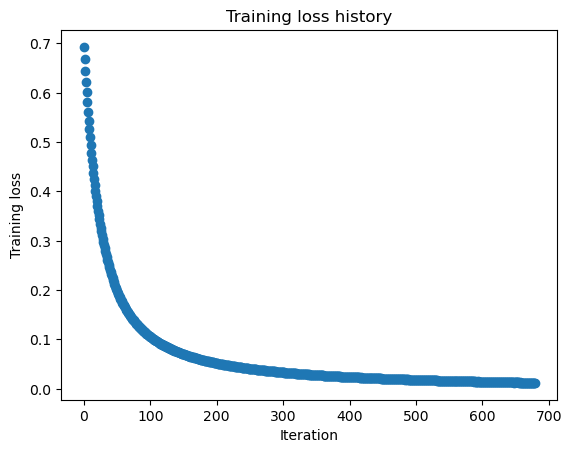

(Iteration 1 / 680) loss: 0.693932
(Epoch 0 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 11 / 680) loss: 0.493561
(Iteration 21 / 680) loss: 0.369953
(Iteration 31 / 680) loss: 0.289782
(Epoch 1 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 41 / 680) loss: 0.235740
(Iteration 51 / 680) loss: 0.196496
(Iteration 61 / 680) loss: 0.167758
(Epoch 2 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 71 / 680) loss: 0.145548
(Iteration 81 / 680) loss: 0.128171
(Iteration 91 / 680) loss: 0.114436
(Iteration 101 / 680) loss: 0.102104
(Epoch 3 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 111 / 680) loss: 0.092174
(Iteration 121 / 680) loss: 0.083462
(Iteration 131 / 680) loss: 0.076461
(Epoch 4 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 141 / 680) loss: 0.070642
(Iteration 151 / 680) loss: 0.065982
(Iteration 161 / 680) loss: 0.059522
(Epoch 5 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 171 / 680) loss: 0.054810
(Iteration 181 / 680)

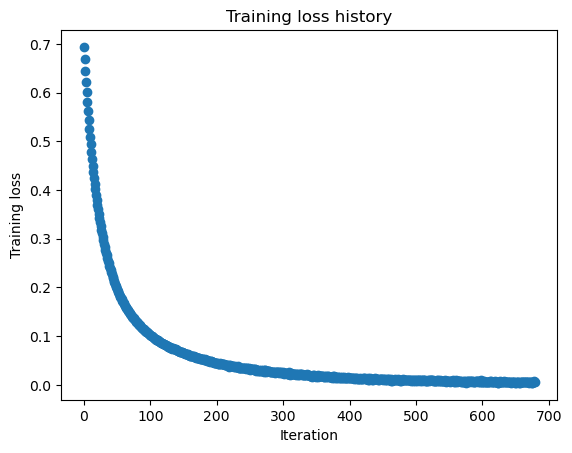

(Iteration 1 / 680) loss: 0.697821
(Epoch 0 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 11 / 680) loss: 0.489683
(Iteration 21 / 680) loss: 0.360733
(Iteration 31 / 680) loss: 0.277739
(Epoch 1 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 41 / 680) loss: 0.216408
(Iteration 51 / 680) loss: 0.176317
(Iteration 61 / 680) loss: 0.147496
(Epoch 2 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 71 / 680) loss: 0.125272
(Iteration 81 / 680) loss: 0.100508
(Iteration 91 / 680) loss: 0.082004
(Iteration 101 / 680) loss: 0.066175
(Epoch 3 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 111 / 680) loss: 0.051203
(Iteration 121 / 680) loss: 0.045610
(Iteration 131 / 680) loss: 0.040351
(Epoch 4 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 141 / 680) loss: 0.041867
(Iteration 151 / 680) loss: 0.030296
(Iteration 161 / 680) loss: 0.029855
(Epoch 5 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 171 / 680) loss: 0.027841
(Iteration 181 / 680)

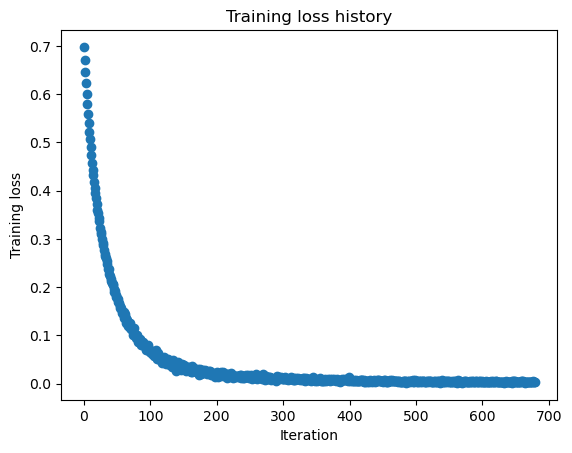

(Iteration 1 / 680) loss: 0.694765
(Epoch 0 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 11 / 680) loss: 0.462595
(Iteration 21 / 680) loss: 0.322887
(Iteration 31 / 680) loss: 0.194149
(Epoch 1 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 41 / 680) loss: 0.122209
(Iteration 51 / 680) loss: 0.096363
(Iteration 61 / 680) loss: 0.078827
(Epoch 2 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 71 / 680) loss: 0.042193
(Iteration 81 / 680) loss: 0.053633
(Iteration 91 / 680) loss: 0.036682
(Iteration 101 / 680) loss: 0.037376
(Epoch 3 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 111 / 680) loss: 0.026379
(Iteration 121 / 680) loss: 0.028154
(Iteration 131 / 680) loss: 0.021206
(Epoch 4 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 141 / 680) loss: 0.019531
(Iteration 151 / 680) loss: 0.011782
(Iteration 161 / 680) loss: 0.017918
(Epoch 5 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 171 / 680) loss: 0.016065
(Iteration 181 / 680)

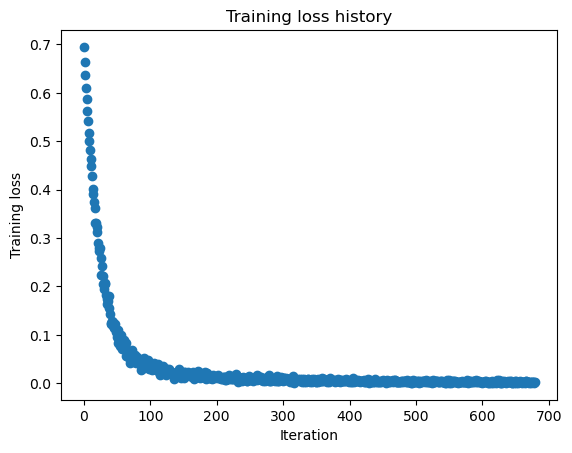

(Iteration 1 / 680) loss: 0.672973
(Epoch 0 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 11 / 680) loss: 0.399667
(Iteration 21 / 680) loss: 0.245044
(Iteration 31 / 680) loss: 0.131209
(Epoch 1 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 41 / 680) loss: 0.102218
(Iteration 51 / 680) loss: 0.056092
(Iteration 61 / 680) loss: 0.039722
(Epoch 2 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 71 / 680) loss: 0.049347
(Iteration 81 / 680) loss: 0.041833
(Iteration 91 / 680) loss: 0.028911
(Iteration 101 / 680) loss: 0.038536
(Epoch 3 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 111 / 680) loss: 0.023007
(Iteration 121 / 680) loss: 0.020794
(Iteration 131 / 680) loss: 0.017589
(Epoch 4 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 141 / 680) loss: 0.016018
(Iteration 151 / 680) loss: 0.013858
(Iteration 161 / 680) loss: 0.021867
(Epoch 5 / 20) train acc: 0.446101; val_acc: 0.442000
(Iteration 171 / 680) loss: 0.010896
(Iteration 181 / 680)

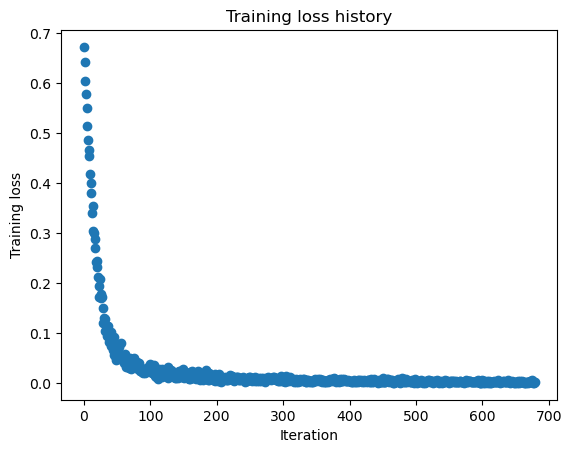

In [510]:
from matplotlib import pyplot as plt

N = 1
D = train.shape[1] - 1
X = train.values[:,:-1]
y = train.values[:, -1].astype(int)
X_val = test.values[:,:-1]
y_val = test.values[:, -1].astype(int)
print(X.shape, y.shape, X_val.shape, y_val.shape)

H1, H2 = 3, 3
C = 2

num_train = 20
small_data = {
  'X_train': X,
  'y_train': y,
  'X_val': X_val,
  'y_val': y_val,
}

weight_scale = 4e-2
learning_rate = 5e-2
for H in [5, 10, 25, 50, 100]:
    model = FullyConnectedNet([H, H],
                  weight_scale=weight_scale, dtype=np.float64, input_dim=D, num_classes=C)
    # print(model.params)
    solver = Solver(model, small_data,
                    print_every=10, num_epochs=20, batch_size=25,
                    update_rule='sgd',
                    lr_decay=1,
                    optim_config={
                      'learning_rate': learning_rate,
                    }
             )
    solver.train()
    
    plt.plot(solver.loss_history, 'o')
    plt.title('Training loss history')
    plt.xlabel('Iteration')
    plt.ylabel('Training loss')
    plt.show()

Pytorch network:

In [450]:
import torch
import torch.optim as optim
import torch.nn as nn
from torch._C import TracingState
torch.set_default_device('mps')

class FeedForwardNN(nn.Module):
    def __init__(self, input_dim, output_dim, hidden_dims, dropout_prob=0.5, batch_norm=False, weight_decay=1e-4):
        super(FeedForwardNN, self).__init__()

        layers = []
        prev_dim = input_dim

        # Create hidden layers with optional batch normalization and dropout
        for dim in hidden_dims:
            if batch_norm:
                layers.append(nn.BatchNorm1d(prev_dim))
            forward_layer = nn.Linear(prev_dim, dim)
            torch.nn.init.kaiming_uniform_(forward_layer.weight)
            layers.append(forward_layer)
            layers.append(nn.ReLU())
            if dropout_prob > 0:
                layers.append(nn.Dropout(p=dropout_prob))
            prev_dim = dim

        # Output layer
        output_layer = nn.Linear(prev_dim, output_dim)
        torch.nn.init.kaiming_uniform_(output_layer.weight)
        layers.append(output_layer)
        layers.append(nn.Sigmoid())

        self.fnn = nn.Sequential(*layers)

#         L2 weight regularization for all linear layers
        self.weight_decay = weight_decay
        if weight_decay > 0:
            for layer in self.fnn:
                if isinstance(layer, nn.Linear):
                    layer.weight.data.add_(weight_decay)

    def forward(self, x):
        return self.fnn(x)

X = train.values[:,:-1].astype(numpy.float32)
y = train.values[:, -1].astype(numpy.float32)
X_val = test.values[:,:-1].astype(numpy.float32)
y_val = test.values[:, -1].astype(numpy.float32)
X_train_tensor = torch.tensor(X)    
y_train_tensor = torch.tensor(y)
X_val_tensor = torch.tensor(X_val)
y_val_tensor = torch.tensor(y_val)
y_train_tensor = y_train_tensor.view(-1, 1)
y_val_tensor = y_val_tensor.view(-1, 1)
models = []

for width in [5, 10, 25, 50, 100]:
    for depth in [3, 5, 9]:
        # Instantiate the model
        input_dim = train.dtypes.size - 1  # Change this to match the input dimension of your data
        output_dim = 1  # Change this to the number of output classes
        hidden_dims = []  # Adjust the hidden layer dimensions as desired
        for i in range(depth):
            hidden_dims.append(width)
        dropout_prob = 0  # Change this to your desired dropout probability (0 to disable)
        use_batch_norm = True  # Set to True to use batch normalization, False to disable
        weight_decay = 1  # Change this to your desired weight decay
        
        model = FeedForwardNN(input_dim, output_dim, hidden_dims, dropout_prob, use_batch_norm, weight_decay)
        
        # Print the model architecture# Define a loss function and an optimizer
        criterion = nn.BCELoss()
        optimizer = optim.Adam(model.parameters(), lr=1e-4)
        
        # Training loop
        num_epochs = 400
        
        for epoch in range(num_epochs):
            model.train()  # Set the model to training mode
        
            # Forward pass
            outputs = model(X_train_tensor)
            loss = criterion(outputs, y_train_tensor)
        
            # Backpropagation and optimization
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        
            print(f'Epoch [{epoch + 1}/{num_epochs}], Loss: {loss.item()}')
        models.append((width, depth, model))
    print('Training complete.')

Epoch [1/400], Loss: 11.919034004211426
Epoch [2/400], Loss: 10.192662239074707
Epoch [3/400], Loss: 12.028419494628906
Epoch [4/400], Loss: 11.683004379272461
Epoch [5/400], Loss: 10.126777648925781
Epoch [6/400], Loss: 10.241188049316406
Epoch [7/400], Loss: 12.307738304138184
Epoch [8/400], Loss: 10.941729545593262
Epoch [9/400], Loss: 9.988296508789062
Epoch [10/400], Loss: 11.448705673217773
Epoch [11/400], Loss: 11.37118911743164
Epoch [12/400], Loss: 10.691976547241211
Epoch [13/400], Loss: 9.95326042175293
Epoch [14/400], Loss: 10.829380989074707
Epoch [15/400], Loss: 10.336743354797363
Epoch [16/400], Loss: 10.922365188598633
Epoch [17/400], Loss: 10.753499984741211
Epoch [18/400], Loss: 11.69394588470459
Epoch [19/400], Loss: 11.372876167297363
Epoch [20/400], Loss: 11.171576499938965
Epoch [21/400], Loss: 11.98626708984375
Epoch [22/400], Loss: 10.82835865020752
Epoch [23/400], Loss: 11.024263381958008
Epoch [24/400], Loss: 10.580915451049805
Epoch [25/400], Loss: 9.75863170

In [451]:
# Import any necessary libraries
from sklearn.metrics import accuracy_score

for width, depth, model in models:
    # Put your model in evaluation mode (turn off dropout if used)
    model.eval()
    
    # Make predictions on the training data
    with torch.no_grad():
        predictions = model(X_train_tensor)
    
    # Convert the predictions to binary values (0 or 1)
    predicted_labels = (predictions >= 0.5).float()
    
    # Convert the predicted_labels tensor to a NumPy array
    predicted_labels = predicted_labels.cpu().numpy()
    
    # Convert 'y_tensor' to a NumPy array for comparison
    actual_labels = y_train_tensor.cpu().numpy()
    
    # Calculate the training accuracy
    train_accuracy = accuracy_score(actual_labels, predicted_labels)
    
    # Print the training accuracy
    print("width", width, "depth", depth, f"Training Accuracy: {train_accuracy * 100:.2f}%")
    
    # Return the model to training mode
    model.train()

width 5 depth 3 Training Accuracy: 32.22%
width 5 depth 5 Training Accuracy: 44.61%
width 5 depth 9 Training Accuracy: 54.82%
width 10 depth 3 Training Accuracy: 44.61%
width 10 depth 5 Training Accuracy: 44.61%
width 10 depth 9 Training Accuracy: 48.74%
width 25 depth 3 Training Accuracy: 30.39%
width 25 depth 5 Training Accuracy: 44.61%
width 25 depth 9 Training Accuracy: 44.61%
width 50 depth 3 Training Accuracy: 44.61%
width 50 depth 5 Training Accuracy: 44.61%
width 50 depth 9 Training Accuracy: 43.81%
width 100 depth 3 Training Accuracy: 44.61%
width 100 depth 5 Training Accuracy: 44.61%
width 100 depth 9 Training Accuracy: 44.61%


In [452]:
# Import any necessary libraries
from sklearn.metrics import accuracy_score

for width, depth, model in models:
    # Put your model in evaluation mode (turn off dropout if used)
    model.eval()
    
    # Make predictions on the training data
    with torch.no_grad():
        predictions = model(X_val_tensor)
    
    # Convert the predictions to binary values (0 or 1)
    predicted_labels = (predictions >= 0.5).float()
    
    # Convert the predicted_labels tensor to a NumPy array
    predicted_labels = predicted_labels.cpu().numpy()
    
    # Convert 'y_tensor' to a NumPy array for comparison
    actual_labels = y_val_tensor.cpu().numpy()
    
    # Calculate the training accuracy
    train_accuracy = accuracy_score(actual_labels, predicted_labels)
    
    # Print the training accuracy
    print("width", width, "depth", depth, f"Test Accuracy: {train_accuracy * 100:.2f}%")
    
    # Return the model to training mode
    model.train()

width 5 depth 3 Test Accuracy: 33.20%
width 5 depth 5 Test Accuracy: 44.20%
width 5 depth 9 Test Accuracy: 54.00%
width 10 depth 3 Test Accuracy: 44.20%
width 10 depth 5 Test Accuracy: 44.20%
width 10 depth 9 Test Accuracy: 47.60%
width 25 depth 3 Test Accuracy: 33.80%
width 25 depth 5 Test Accuracy: 44.20%
width 25 depth 9 Test Accuracy: 44.20%
width 50 depth 3 Test Accuracy: 44.20%
width 50 depth 5 Test Accuracy: 44.20%
width 50 depth 9 Test Accuracy: 43.80%
width 100 depth 3 Test Accuracy: 44.20%
width 100 depth 5 Test Accuracy: 44.20%
width 100 depth 9 Test Accuracy: 44.20%


Now logistic regression.

In [ ]:
import pandas as pd
import os

cwd = os.getcwd()
train = pd.read_csv(cwd + "/bank-note/train.csv", names=['variance', 'skewness', 'curtosis', 'entropy', 'label'])
print(train.head())

In [ ]:
train['label'] = train['label'].apply(lambda x: 1 if x == 1 else -1)
print(train.head())

In [ ]:
test = pd.read_csv(cwd + "/bank-note/test.csv", names=['variance', 'skewness', 'curtosis', 'entropy', 'label'])
print(test.head())

In [ ]:
test['label'] = test['label'].apply(lambda x: 1 if x == 1 else -1)
print(test.head())

In [481]:
def bias_trick(X: np.ndarray):
  """
  Used to add 1 to the input array
  """
  output: list[np.ndarray] = []
  for i in range(len(X)):
    output.append(np.append(X[i], 1))
  return np.array(output)

X = train.values[:,:-1]
y = train.values[:, -1].astype(int)
X_val = test.values[:,:-1]
y_val = test.values[:, -1].astype(int)
X_bias = bias_trick(X)
print(X_bias)

[[ 3.84809995 10.15390015 -3.85610008 -4.22279978  1.        ]
 [ 4.00470018  0.45936999  1.36210001  1.61810005  1.        ]
 [-0.048008   -1.60370004  8.47560024  0.75558001  1.        ]
 ...
 [-1.24240005 -1.71749997 -0.52552998 -0.21036001  1.        ]
 [ 1.83729994  6.12919998  0.84026998  0.55256999  1.        ]
 [-2.01489997  3.6874001  -1.93850005 -3.89179993  1.        ]]


In [531]:
import sklearn
from numpy import linalg as LN
import math

epochs = 100
y = y.astype(float)
weights = np.zeros(X_bias.shape[1]).astype(float)
learning_rate = 3e-4
for epoch in range(epochs):
    sklearn.utils.shuffle(X_bias, y)
    for i in range(X_bias.shape[0]):
        learning_rate = learning_rate / (1 + learning_rate/1000000 * i)
        print(LN.norm((-1 * y[i] * X_bias[i] * math.exp(-1 * y[i] * np.dot(weights, X_bias[i])) / (1 + math.exp(-1 * y[i] * np.dot(weights, X_bias[i]))))))
        step = learning_rate * (-1 * y[i] * X_bias[i] * math.exp(-1 * y[i] * np.dot(weights, X_bias[i])) / (1 + math.exp(-1 * y[i] * np.dot(weights, X_bias[i]))))
        weights = weights - step
print(weights)

6.156523109619229
2.328783340762386
4.3709387505809545
2.2367839508259673
3.255295785440727
4.055184237560612
1.9869837297317086
5.404994602623685
3.3278364236902114
3.404625218759686
5.84538031963764
2.3574946011720845
3.4753562774463362
1.6191267744308104
10.03506025404005
4.133630457507573
3.4045549005147255
5.8002037090392635
2.275234838547706
4.154567228055727
0.5474662917133719
3.0794689939990323
8.899950861695295
2.7786031571703407
3.863291652654671
0.8093637486240597
3.5973962542580202
2.6013870771348064
3.5673737658208777
3.6316809582900844
2.621660010700909
4.562505602612448
2.431814329747906
9.851671225957396
2.829783405884545
4.252175483023271
0.7529208184011709
1.8640365583367406
2.811405563098484
2.4770526650093485
1.2367773999728424
3.4227794118297066
5.585197242671523
2.835536751388147
1.7292395054855
3.1078776099387304
0.910816019906228
5.99821652666261
5.534722591050536
4.3213199909119
4.179675918645806
2.922249548396647
2.5255782915596052
2.4681841543370107
5.6014830

In [532]:
count = 0
for example, answer in zip(X_bias, y):
    if np.sign(np.dot(weights, example)) == answer:
        count += 1
print(count / len(y))    

0.9839449541284404


In [533]:
# !jupyter nbconvert --to script nn.ipynb

[NbConvertApp] Converting notebook nn.ipynb to script
[NbConvertApp] Writing 48502 bytes to nn.py
